## Importando librerias

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import missingno as msno
pd.options.display.max_columns = None #Para ver todas las culumnas

## Archivo #11 de diccionario de tablas

In [2]:
# INPUTEVENTS_MV
df1 = pd.read_csv("dataset/INPUTEVENTS_MV.csv")

### Vistazo general

In [3]:
df1.head()

,row_id,subject_id,hadm_id,icustay_id,starttime,endtime,itemid,amount,amountuom,rate,rateuom,storetime,cgid,orderid,linkorderid,ordercategoryname,secondaryordercategoryname,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_editedby,comments_canceledby,comments_date,originalamount,originalrate
0,118897,42367,139932,250305,2147-10-29 16:45:00,2147-10-29 16:46:00,225799,60.000000,ml,NaN,NaN,2147-10-29 16:45:00,16027,11922,11922,14-Oral/Gastric Intake,NaN,Main order parameter,Bolus,70.0,60.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,60.0,60.000000
1,118898,42367,139932,250305,2147-10-20 13:17:00,2147-10-20 13:18:00,223258,10.000000,units,NaN,NaN,2147-10-20 13:17:00,17446,27063,27063,06-Insulin (Non IV),NaN,Main order parameter,Drug Push,70.0,NaN,NaN,0,0,1,Rewritten,NaN,RN,2147-10-20 13:18:00,10.0,10.000000
2,118899,42367,139932,250305,2147-10-29 03:23:00,2147-10-29 03:53:00,226089,99.999999,ml,199.999998,mL/hour,2147-10-29 03:23:00,20581,69729,69729,02-Fluids (Crystalloids),Additive (Crystalloid),Main order parameter,Continuous IV,70.0,100.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,100.0,200.000000
3,118900,42367,139932,250305,2147-10-22 22:00:00,2147-10-22 22:01:00,225799,40.000000,ml,NaN,NaN,2147-10-22 23:12:00,15803,90817,90817,14-Oral/Gastric Intake,NaN,Main order parameter,Bolus,70.0,40.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,40.0,40.000000
4,118901,42367,139932,250305,2147-10-16 06:21:00,2147-10-17 06:10:00,225936,1309.899995,ml,54.999300,mL/hour,2147-10-17 12:32:00,17062,98889,98889,13-Enteral Nutrition,Additives (EN),Main order parameter,Continuous IV,70.0,1320.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,1309.9,54.999298


In [4]:
df1.tail()

,row_id,subject_id,hadm_id,icustay_id,starttime,endtime,itemid,amount,amountuom,rate,rateuom,storetime,cgid,orderid,linkorderid,ordercategoryname,secondaryordercategoryname,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_editedby,comments_canceledby,comments_date,originalamount,originalrate
13219,3349714,41976,145024,291067,2202-05-02 13:50:00,2202-05-02 13:51:00,225851,1.000000,dose,NaN,NaN,2202-05-02 13:51:00,16617,4882453,4882453,08-Antibiotics (IV),02-Fluids (Crystalloids),Main order parameter,Drug Push,73.4,100.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,1.0,1.000000
13220,3349715,41976,145024,291067,2202-05-02 13:50:00,2202-05-02 13:51:00,220949,100.000000,ml,NaN,NaN,2202-05-02 13:51:00,16617,4882453,4882453,08-Antibiotics (IV),02-Fluids (Crystalloids),Mixed solution,Drug Push,73.4,100.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,100.0,0.000000
13221,3349716,41976,145024,291067,2202-05-02 01:00:00,2202-05-02 01:01:00,225851,1.000000,dose,NaN,NaN,2202-05-02 02:04:00,14605,6096423,6096423,08-Antibiotics (IV),02-Fluids (Crystalloids),Main order parameter,Drug Push,73.4,50.0,ml,0,0,1,Rewritten,NaN,RN,2202-05-02 02:57:00,1.0,1.000000
13222,3349717,41976,145024,291067,2202-05-02 01:00:00,2202-05-02 01:01:00,220949,50.000000,ml,NaN,NaN,2202-05-02 02:04:00,14605,6096423,6096423,08-Antibiotics (IV),02-Fluids (Crystalloids),Mixed solution,Drug Push,73.4,50.0,ml,0,0,1,Rewritten,NaN,RN,2202-05-02 02:57:00,50.0,0.000000
13223,3349718,41976,145024,291067,2202-05-02 01:00:00,2202-05-02 14:18:00,225823,999.999974,ml,75.187968,mL/hour,2202-05-02 16:26:00,14605,9549361,9549361,02-Fluids (Crystalloids),Additive (Crystalloid),Main order parameter,Continuous IV,73.4,1000.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,1000.0,75.187965


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13224 entries, 0 to 13223
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   row_id                         13224 non-null  int64  
 1   subject_id                     13224 non-null  int64  
 2   hadm_id                        13224 non-null  int64  
 3   icustay_id                     13224 non-null  int64  
 4   starttime                      13224 non-null  object 
 5   endtime                        13224 non-null  object 
 6   itemid                         13224 non-null  int64  
 7   amount                         13224 non-null  float64
 8   amountuom                      13224 non-null  object 
 9   rate                           7335 non-null   float64
 10  rateuom                        7335 non-null   object 
 11  storetime                      13224 non-null  object 
 12  cgid                           13224 non-null 

In [6]:
df1.describe()

,row_id,subject_id,hadm_id,icustay_id,itemid,amount,rate,cgid,orderid,linkorderid,patientweight,totalamount,isopenbag,continueinnextdept,cancelreason,originalamount,originalrate
count,1.322400e+04,13224.000000,13224.000000,13224.000000,13224.000000,13224.000000,7335.000000,13224.000000,1.322400e+04,1.322400e+04,13224.000000,11784.000000,13224.000000,13224.0,13224.000000,13224.000000,13224.000000
mean,6.652818e+05,42404.879235,153928.562538,245567.986086,224595.929900,203.067075,73.485069,17896.564806,4.999388e+06,5.009660e+06,78.833916,267.719094,0.000605,0.0,0.227541,303.842428,72.648965
std,5.308038e+05,1394.436928,26697.643130,27138.029509,2201.881063,993.493285,206.385492,2142.106243,2.881516e+06,2.836615e+06,18.543324,352.888612,0.024589,0.0,0.605898,1602.818288,269.686663
min,1.188970e+05,40124.000000,100969.000000,201204.000000,220862.000000,-4000.000000,0.010001,14023.000000,8.260000e+02,8.260000e+02,40.900000,10.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,3.649388e+05,41914.000000,130870.000000,221684.000000,221906.000000,2.915277,4.081633,16053.000000,2.484510e+06,2.581158e+06,70.000000,100.000000,0.000000,0.0,0.000000,9.999999,1.000000
50%,4.710295e+05,42135.000000,163189.000000,239396.000000,225797.000000,34.864490,24.838717,17873.000000,4.990498e+06,5.002594e+06,77.000000,100.000000,0.000000,0.0,0.000000,60.000000,10.000000
75%,8.229042e+05,44212.000000,173269.000000,265505.000000,225943.000000,112.109697,55.000001,19783.000000,7.549429e+06,7.482085e+06,92.000000,250.000000,0.000000,0.0,0.000000,200.000000,50.000000
max,3.349718e+06,44228.000000,198480.000000,298685.000000,228359.000000,25510.203400,5450.049572,21545.000000,9.999944e+06,9.999810e+06,141.700000,7000.000000,1.000000,0.0,2.000000,25000.004000,7000.000000


### Valores duplicados

In [7]:
df1.shape

(13224, 31)

In [8]:
df1.drop_duplicates(inplace=True)
df1.shape

(13224, 31)

### Registros en donde la cantidad (amount) es 0 o negativa

In [9]:
df1[df1["amount"] <= 0]

,row_id,subject_id,hadm_id,icustay_id,starttime,endtime,itemid,amount,amountuom,rate,rateuom,storetime,cgid,orderid,linkorderid,ordercategoryname,secondaryordercategoryname,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_editedby,comments_canceledby,comments_date,originalamount,originalrate
50,118947,42367,139932,250305,2147-10-18 16:00:00,2147-10-18 16:01:00,223258,0.000000,units,NaN,NaN,2147-10-18 16:27:00,16027,656423,656423,06-Insulin (Non IV),NaN,Main order parameter,Drug Push,70.0,NaN,NaN,0,0,0,FinishedRunning,NaN,NaN,NaN,0.000000,0.000000
173,119070,42367,139932,250305,2147-10-10 00:41:00,2147-10-10 00:42:00,225152,0.000000,units,NaN,NaN,2147-10-10 05:41:00,17461,2113993,2113993,05-Med Bolus,NaN,Main order parameter,Drug Push,70.0,NaN,NaN,0,0,2,Rewritten,RN,NaN,2147-10-10 05:42:00,0.000000,0.000000
201,119098,42367,139932,250305,2147-10-10 10:44:00,2147-10-10 10:40:00,225158,-0.666667,ml,10.000000,mL/hour,2147-10-10 10:33:00,17582,2448561,2448561,02-Fluids (Crystalloids),Additive (Crystalloid),Main order parameter,Continuous IV,70.0,893.0,ml,0,0,1,Rewritten,NaN,RN,2147-10-10 10:39:00,893.000000,10.000000
443,119340,42367,139932,250305,2147-10-29 16:44:00,2147-10-29 16:45:00,223258,0.000000,units,NaN,NaN,2147-10-29 16:44:00,16027,5365438,5365438,06-Insulin (Non IV),NaN,Main order parameter,Drug Push,70.0,NaN,NaN,0,0,0,FinishedRunning,NaN,NaN,NaN,0.000000,0.000000
539,119436,42367,139932,250305,2147-10-20 22:00:00,2147-10-20 22:01:00,223258,0.000000,units,NaN,NaN,2147-10-20 22:35:00,14986,6369391,6369391,06-Insulin (Non IV),NaN,Main order parameter,Drug Push,70.0,NaN,NaN,0,0,2,Rewritten,RN,NaN,2147-10-20 22:35:00,0.000000,0.000000
626,119523,42367,139932,250305,2147-10-19 16:10:00,2147-10-19 16:11:00,223258,0.000000,units,NaN,NaN,2147-10-19 17:10:00,16027,7320281,7320281,06-Insulin (Non IV),NaN,Main order parameter,Drug Push,70.0,NaN,NaN,0,0,0,FinishedRunning,NaN,NaN,NaN,0.000000,0.000000
640,119537,42367,139932,250305,2147-10-26 16:00:00,2147-10-26 16:01:00,226453,0.000000,ml,NaN,NaN,2147-10-26 16:35:00,15795,7485450,7485450,14-Oral/Gastric Intake,NaN,Main order parameter,Bolus,70.0,NaN,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,0.000000,0.000000
645,119542,42367,139932,250305,2147-10-28 16:06:00,2147-10-28 16:07:00,223258,0.000000,units,NaN,NaN,2147-10-28 18:06:00,16027,7535056,7535056,06-Insulin (Non IV),NaN,Main order parameter,Drug Push,70.0,NaN,NaN,0,0,0,FinishedRunning,NaN,NaN,NaN,0.000000,0.000000
828,119725,42367,139932,250305,2147-10-14 05:57:00,2147-10-14 05:58:00,223258,0.000000,units,NaN,NaN,2147-10-14 05:57:00,17461,9568801,9568801,06-Insulin (Non IV),NaN,Main order parameter,Drug Push,70.0,NaN,NaN,0,0,0,FinishedRunning,NaN,NaN,NaN,0.000000,0.000000
1073,232389,42281,195911,256746,2119-10-17 15:15:00,2119-10-17 15:13:00,225158,-8.333333,ml,249.999990,mL/hour,2119-10-17 15:11:00,20345,5901862,5901862,02-Fluids (Crystalloids),Additive (Crystalloid),Main order parameter,Continuous IV,69.8,1000.0,ml,0,0,1,Rewritten,NaN,RN,2119-10-17 15:12:00,1000.000000,250.000000


In [10]:
df1["cancelreason"].unique()

array([0, 1, 2], dtype=int64)

In [11]:
df1["isopenbag"].unique()

array([0, 1], dtype=int64)

In [12]:
df1["continueinnextdept"].unique()

array([0], dtype=int64)

In [13]:
# Para entender un poco mejor la info decidi hacer esta funcion para conocer los campos a los que les faltan valores

def valores_NaN(nombre_dataframe):   # Creamos una funcion para conocer las columnas y cuantos valores NaN tienen
    """
    Esta funcion da la informacion solo de las columnas
    que contienen valores faltantes
    
    Parametros
    --------------
    nombre_dataframe: class 'pandas.core.frame.DataFrame'
            Este parametro debe de ser un objeto DataFrame
            de la libreria Pandas
            
    Devoluciones
    -------------
    str: 
        Devuelve un string con la siguiente informacion
        - Nombre del campo
        - La cantidad de valores nulos
        - Tipo de dato del campo
    """
    lista_columnas = list(nombre_dataframe.columns)
    contar = 0
    for columna in lista_columnas:                 # - Iteramos por esa lista para checar cada columna y saber si esta contiene datos nulos o no
        valor = nombre_dataframe[columna].hasnans     # hasnans nos devuelve True si en una columna hay algun valor NaN
        if valor:                                    # En el caso de que exista un valor NaN imprimira el nombre de la columna que tiene el valor NaN
            nulos = nombre_dataframe[columna].isnull().sum()
            i = nombre_dataframe[columna].dtype # isnull revisara cada registro y mostrara con True en donde el valor sea NaN, sum se encargara de contar esos True
            print(f"La columna con el nombre: '{columna}' tiene: '{nulos}' valores NaN en sus registros y sus datos son del tipo: '{i}'")  # Para una manera mas facil de entender lo imprimimos de esta manera
            contar += 1
    print(f"La cantidad de columnas con valores faltantes es de: {contar}")



valores_NaN(df1)

La columna con el nombre: 'rate' tiene: '5889' valores NaN en sus registros y sus datos son del tipo: 'float64'
La columna con el nombre: 'rateuom' tiene: '5889' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'secondaryordercategoryname' tiene: '3385' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'totalamount' tiene: '1440' valores NaN en sus registros y sus datos son del tipo: 'float64'
La columna con el nombre: 'totalamountuom' tiene: '1433' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'comments_editedby' tiene: '11959' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'comments_canceledby' tiene: '12745' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'comments_date' tiene: '11480' valores NaN en sus registros y sus datos son del tipo: 'object'
La cantidad de columnas con 

### Analisis 
- Nombre del archivo: INPUTEVENTS_MV.
- Descripcion: Admisión de pacientes monitorizados con el sistema iMDSoft Metavision mientras están en la UCI.
### - - - - - - - - - - - - - - - - - - -

1. Hay 31 columnas (4 son de id, row id es el id de la linea).
2. Hay 8 columnas con valores faltantes.
3. El archivo tiene 13,224 registros.
4. 11 columnas son de tipo int64, 6  de tipo float64 las demas son tipo object.
5. 4 columnas del tipo object tienen datos de fechas.
6. Las columnas "comments_editedby" y "comments_canceledby" son en su mayoria datos nulos.
7. El campo amount tiene valores negativos y los que tienen cantidad en 0 tienen un tiempo de estancia de 1 minuto.
8. 3 columnas con datos numericos parecen referirse a una categoria.
9. 8 columnas son del tipo id

### Revision de columnas con valores faltantes

<AxesSubplot:>

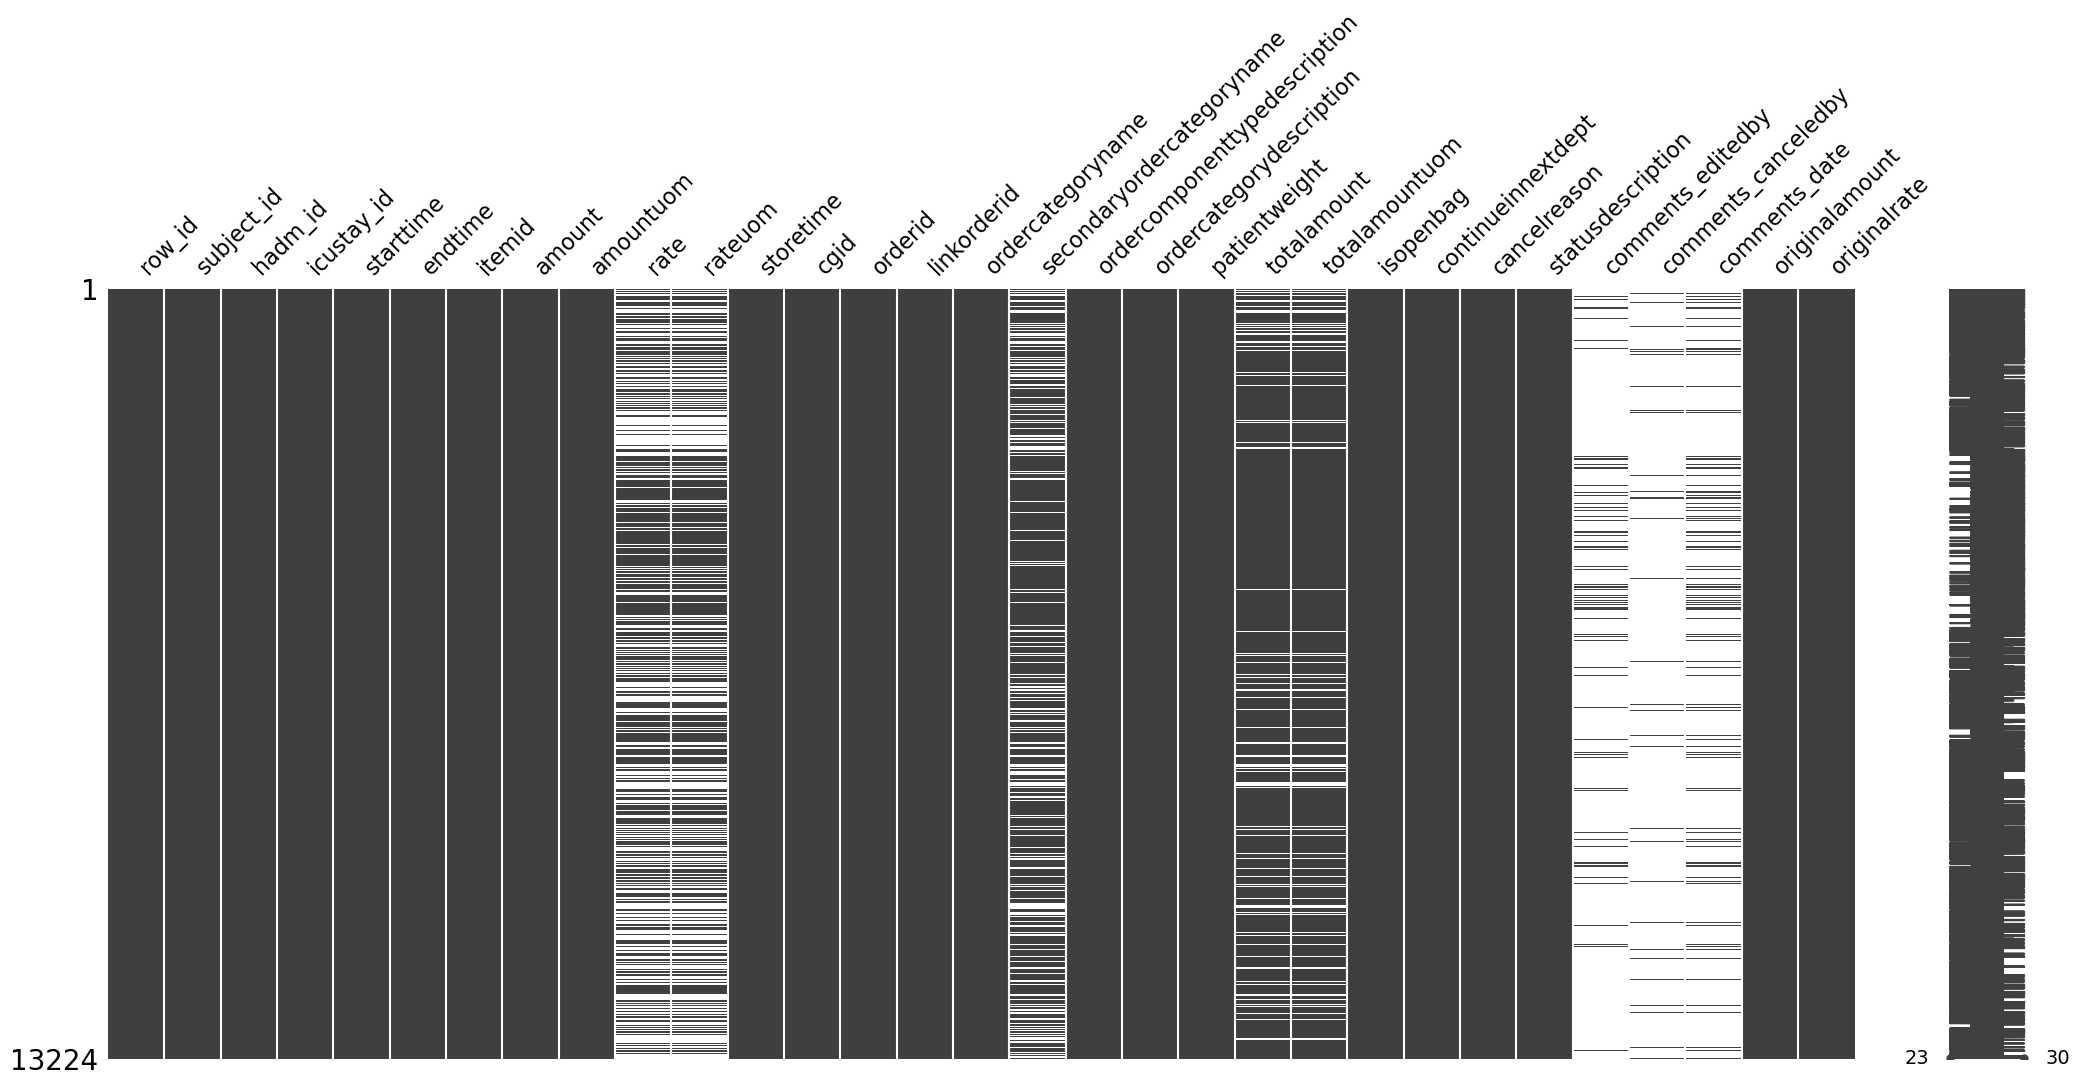

In [14]:
msno.matrix(df1)

In [15]:
df1nan = df1[['rate','rateuom','secondaryordercategoryname','totalamount','totalamountuom','comments_editedby','comments_canceledby','comments_date']]

In [16]:
df1nan

,rate,rateuom,secondaryordercategoryname,totalamount,totalamountuom,comments_editedby,comments_canceledby,comments_date
0,NaN,NaN,NaN,60.0,ml,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,RN,2147-10-20 13:18:00
2,199.999998,mL/hour,Additive (Crystalloid),100.0,ml,NaN,NaN,NaN
3,NaN,NaN,NaN,40.0,ml,NaN,NaN,NaN
4,54.999300,mL/hour,Additives (EN),1320.0,ml,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
13219,NaN,NaN,02-Fluids (Crystalloids),100.0,ml,NaN,NaN,NaN
13220,NaN,NaN,02-Fluids (Crystalloids),100.0,ml,NaN,NaN,NaN
13221,NaN,NaN,02-Fluids (Crystalloids),50.0,ml,NaN,RN,2202-05-02 02:57:00
13222,NaN,NaN,02-Fluids (Crystalloids),50.0,ml,NaN,RN,2202-05-02 02:57:00


In [17]:
df1nan["rateuom"].unique()

array([nan, 'mL/hour', 'mcg/kg/min', 'mg/hour', 'mg/kg/hour',
       'units/hour', 'mcg/hour', 'mEq./hour', 'grams/hour', 'mL/kg/hour',
       'mg/min', 'grams/min'], dtype=object)

In [18]:
df1nan["secondaryordercategoryname"].unique()

array([nan, 'Additive (Crystalloid)', 'Additives (EN)',
       '02-Fluids (Crystalloids)', 'Additives (PN)'], dtype=object)

In [19]:
df1nan["totalamountuom"].unique()

array(['ml', nan], dtype=object)

In [20]:
df1nan["comments_editedby"].unique()

array([nan, 'RN', 'Unknown'], dtype=object)

In [21]:
df1nan["comments_canceledby"].unique()

array([nan, 'RN', 'Unknown'], dtype=object)

In [22]:
df1nan.describe()

,rate,totalamount
count,7335.000000,11784.000000
mean,73.485069,267.719094
std,206.385492,352.888612
min,0.010001,10.000000
25%,4.081633,100.000000
50%,24.838717,100.000000
75%,55.000001,250.000000
max,5450.049572,7000.000000


### Campos con fechas

In [23]:
df1["starttime"] = pd.to_datetime(df1["starttime"])
df1["endtime"] = pd.to_datetime(df1["endtime"])
df1["comments_date"] = pd.to_datetime(df1["comments_date"])
df1["storetime"] = pd.to_datetime(df1["storetime"])

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13224 entries, 0 to 13223
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   row_id                         13224 non-null  int64         
 1   subject_id                     13224 non-null  int64         
 2   hadm_id                        13224 non-null  int64         
 3   icustay_id                     13224 non-null  int64         
 4   starttime                      13224 non-null  datetime64[ns]
 5   endtime                        13224 non-null  datetime64[ns]
 6   itemid                         13224 non-null  int64         
 7   amount                         13224 non-null  float64       
 8   amountuom                      13224 non-null  object        
 9   rate                           7335 non-null   float64       
 10  rateuom                        7335 non-null   object        
 11  storetime      

In [25]:
df1.head()

,row_id,subject_id,hadm_id,icustay_id,starttime,endtime,itemid,amount,amountuom,rate,rateuom,storetime,cgid,orderid,linkorderid,ordercategoryname,secondaryordercategoryname,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_editedby,comments_canceledby,comments_date,originalamount,originalrate
0,118897,42367,139932,250305,2147-10-29 16:45:00,2147-10-29 16:46:00,225799,60.000000,ml,NaN,NaN,2147-10-29 16:45:00,16027,11922,11922,14-Oral/Gastric Intake,NaN,Main order parameter,Bolus,70.0,60.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaT,60.0,60.000000
1,118898,42367,139932,250305,2147-10-20 13:17:00,2147-10-20 13:18:00,223258,10.000000,units,NaN,NaN,2147-10-20 13:17:00,17446,27063,27063,06-Insulin (Non IV),NaN,Main order parameter,Drug Push,70.0,NaN,NaN,0,0,1,Rewritten,NaN,RN,2147-10-20 13:18:00,10.0,10.000000
2,118899,42367,139932,250305,2147-10-29 03:23:00,2147-10-29 03:53:00,226089,99.999999,ml,199.999998,mL/hour,2147-10-29 03:23:00,20581,69729,69729,02-Fluids (Crystalloids),Additive (Crystalloid),Main order parameter,Continuous IV,70.0,100.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaT,100.0,200.000000
3,118900,42367,139932,250305,2147-10-22 22:00:00,2147-10-22 22:01:00,225799,40.000000,ml,NaN,NaN,2147-10-22 23:12:00,15803,90817,90817,14-Oral/Gastric Intake,NaN,Main order parameter,Bolus,70.0,40.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaT,40.0,40.000000
4,118901,42367,139932,250305,2147-10-16 06:21:00,2147-10-17 06:10:00,225936,1309.899995,ml,54.999300,mL/hour,2147-10-17 12:32:00,17062,98889,98889,13-Enteral Nutrition,Additives (EN),Main order parameter,Continuous IV,70.0,1320.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaT,1309.9,54.999298


### Creare una nueva columna para saber la duracion de cada paciente 

In [26]:
df1["durationtime"] = df1["endtime"] - df1["starttime"]

In [27]:
tdelta = datetime.timedelta(1) # Para representar 1 dia

In [28]:
df1.head()

,row_id,subject_id,hadm_id,icustay_id,starttime,endtime,itemid,amount,amountuom,rate,rateuom,storetime,cgid,orderid,linkorderid,ordercategoryname,secondaryordercategoryname,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_editedby,comments_canceledby,comments_date,originalamount,originalrate,durationtime
0,118897,42367,139932,250305,2147-10-29 16:45:00,2147-10-29 16:46:00,225799,60.000000,ml,NaN,NaN,2147-10-29 16:45:00,16027,11922,11922,14-Oral/Gastric Intake,NaN,Main order parameter,Bolus,70.0,60.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaT,60.0,60.000000,0 days 00:01:00
1,118898,42367,139932,250305,2147-10-20 13:17:00,2147-10-20 13:18:00,223258,10.000000,units,NaN,NaN,2147-10-20 13:17:00,17446,27063,27063,06-Insulin (Non IV),NaN,Main order parameter,Drug Push,70.0,NaN,NaN,0,0,1,Rewritten,NaN,RN,2147-10-20 13:18:00,10.0,10.000000,0 days 00:01:00
2,118899,42367,139932,250305,2147-10-29 03:23:00,2147-10-29 03:53:00,226089,99.999999,ml,199.999998,mL/hour,2147-10-29 03:23:00,20581,69729,69729,02-Fluids (Crystalloids),Additive (Crystalloid),Main order parameter,Continuous IV,70.0,100.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaT,100.0,200.000000,0 days 00:30:00
3,118900,42367,139932,250305,2147-10-22 22:00:00,2147-10-22 22:01:00,225799,40.000000,ml,NaN,NaN,2147-10-22 23:12:00,15803,90817,90817,14-Oral/Gastric Intake,NaN,Main order parameter,Bolus,70.0,40.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaT,40.0,40.000000,0 days 00:01:00
4,118901,42367,139932,250305,2147-10-16 06:21:00,2147-10-17 06:10:00,225936,1309.899995,ml,54.999300,mL/hour,2147-10-17 12:32:00,17062,98889,98889,13-Enteral Nutrition,Additives (EN),Main order parameter,Continuous IV,70.0,1320.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaT,1309.9,54.999298,0 days 23:49:00


In [29]:
df1["durationtime"][df1["durationtime"] >= tdelta].count()

353

**Hay 353 registros en los que el paciente a durado mas de 1 dia**

In [30]:
df1["durationtime"].mean() # El promedio de estancia es de 3 horas 35 minutos

Timedelta('0 days 03:35:23.734119782')

In [31]:
df1["durationtime"][df1["durationtime"] <= tdelta].mean() # El promedio de estancia de las personas sin tomar
                                                            #las personas que duraron mas de 1 dia

Timedelta('0 days 02:32:02.938623682')

In [32]:
df1["durationtime"] = df1["durationtime"].apply(lambda x: (x.days * 1440) + (x.seconds)/60)

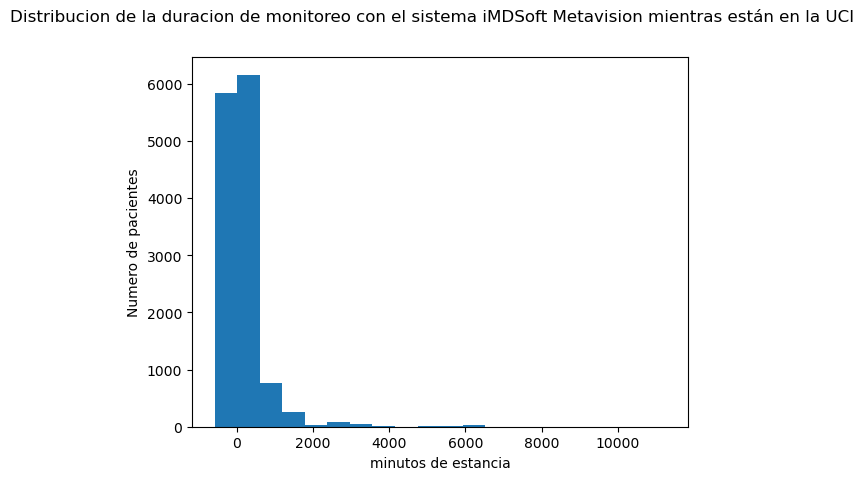

In [33]:
# Aca decidimos la cantidad de bines que queremos tomar
valores = df1["durationtime"]
num_bins = 20

# Creamos la figura y los ejes
fig, ax = plt.subplots()
fig.suptitle("Distribucion de la duracion de monitoreo con el sistema iMDSoft Metavision mientras están en la UCI")
ax.set(xlabel="minutos de estancia", ylabel="Numero de pacientes")


# Ploteamos el histograma
n, bins, _ = ax.hist(valores, bins = num_bins)

In [34]:
df1[df1["durationtime"] >= 1440].shape

(353, 32)

In [35]:
df1["ordercategoryname"].value_counts()

01-Drips                    4854
02-Fluids (Crystalloids)    2252
08-Antibiotics (IV)         1660
14-Oral/Gastric Intake      1477
13-Enteral Nutrition         789
05-Med Bolus                 676
06-Insulin (Non IV)          408
11-Prophylaxis (Non IV)      295
10-Prophylaxis (IV)          266
03-IV Fluid Bolus            214
07-Blood Products            144
04-Fluids (Colloids)          64
09-Antibiotics (Non IV)       54
16-Pre Admission              53
12-Parenteral Nutrition       18
Name: ordercategoryname, dtype: int64

### Cambios
- Las columnas de fechas se pasaron al tipo de dato datetime
- Se creo una nueva columna llamada durationtime que contiene el valor en minutos del tiempo que estuvo el paciente conectado a un equipo MV
- (posible cambio de valores faltantes por unknow)

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

## Archivo #12 de diccionario de Tablas (NOTEEVENTS)

In [37]:
df2 = pd.read_csv("dataset/NOTEEVENTS.csv")

In [38]:
df2

,row_id,subject_id,hadm_id,chartdate,charttime,storetime,category,description,cgid,iserror,text


In [39]:
# Este archivo esta vacio

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

## Archivo #13 de diccionario de Tablas (OUTPUTEVENTS)

In [40]:
df3 = pd.read_csv("dataset/OUTPUTEVENTS.csv")

### Vistazo general

In [41]:
df3.head()

,row_id,subject_id,hadm_id,icustay_id,charttime,itemid,value,valueuom,storetime,cgid,stopped,newbottle,iserror
0,6540,10114,167957,234989.0,2171-10-30 20:00:00,40055,39.0,ml,2171-10-30 20:38:00,15029,NaN,NaN,NaN
1,6541,10114,167957,234989.0,2171-10-30 21:00:00,40055,35.0,ml,2171-10-30 21:18:00,15029,NaN,NaN,NaN
2,6542,10114,167957,234989.0,2171-10-30 23:00:00,40055,100.0,ml,2171-10-30 23:31:00,15029,NaN,NaN,NaN
3,6543,10114,167957,234989.0,2171-10-31 00:00:00,40055,45.0,ml,2171-10-31 00:24:00,15029,NaN,NaN,NaN
4,6544,10114,167957,234989.0,2171-10-31 02:00:00,40055,80.0,ml,2171-10-31 02:02:00,15029,NaN,NaN,NaN


<AxesSubplot:>

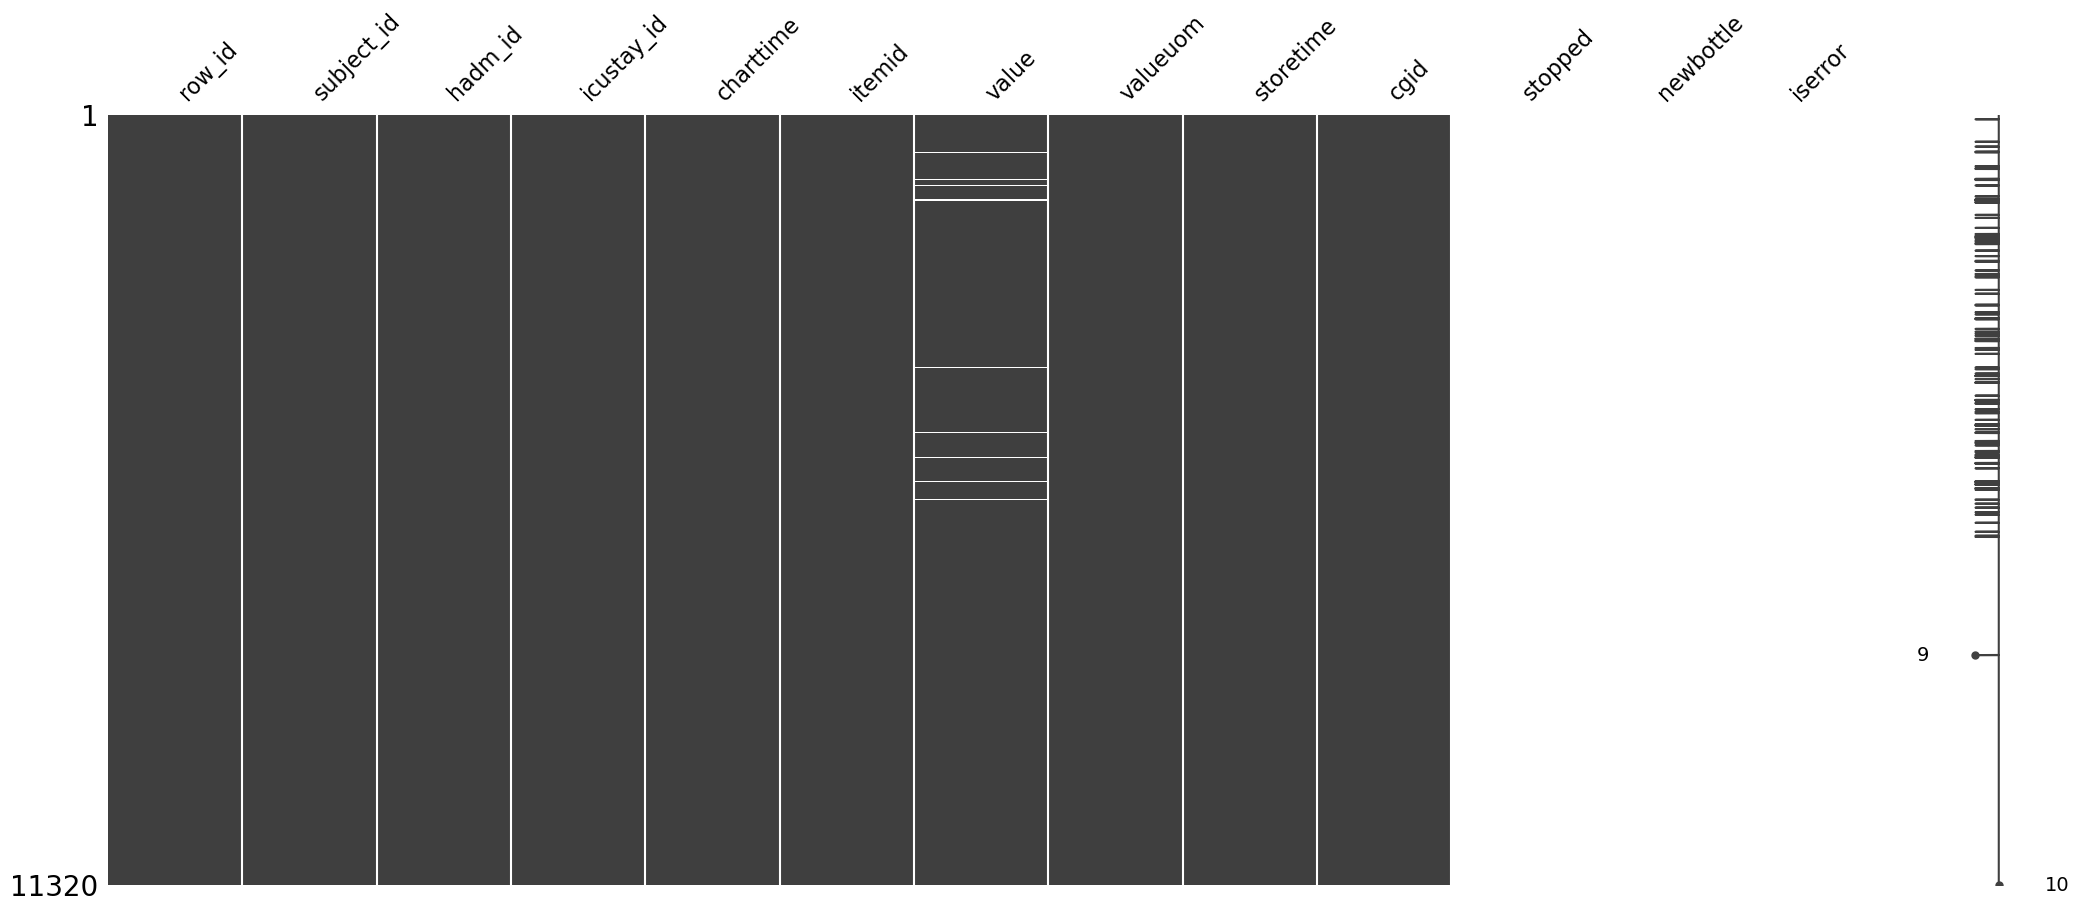

In [42]:
msno.matrix(df3)

In [43]:
valores_NaN(df3)

La columna con el nombre: 'icustay_id' tiene: '1' valores NaN en sus registros y sus datos son del tipo: 'float64'
La columna con el nombre: 'value' tiene: '160' valores NaN en sus registros y sus datos son del tipo: 'float64'
La columna con el nombre: 'valueuom' tiene: '47' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'stopped' tiene: '11320' valores NaN en sus registros y sus datos son del tipo: 'float64'
La columna con el nombre: 'newbottle' tiene: '11320' valores NaN en sus registros y sus datos son del tipo: 'float64'
La columna con el nombre: 'iserror' tiene: '11320' valores NaN en sus registros y sus datos son del tipo: 'float64'
La cantidad de columnas con valores faltantes es de: 6


In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11320 entries, 0 to 11319
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   row_id      11320 non-null  int64  
 1   subject_id  11320 non-null  int64  
 2   hadm_id     11320 non-null  int64  
 3   icustay_id  11319 non-null  float64
 4   charttime   11320 non-null  object 
 5   itemid      11320 non-null  int64  
 6   value       11160 non-null  float64
 7   valueuom    11273 non-null  object 
 8   storetime   11320 non-null  object 
 9   cgid        11320 non-null  int64  
 10  stopped     0 non-null      float64
 11  newbottle   0 non-null      float64
 12  iserror     0 non-null      float64
dtypes: float64(5), int64(5), object(3)
memory usage: 1.1+ MB


In [46]:
df3.describe()

,row_id,subject_id,hadm_id,icustay_id,itemid,value,cgid,stopped,newbottle,iserror
count,1.132000e+04,11320.000000,11320.000000,11319.000000,11320.000000,11160.000000,11320.000000,0.0,0.0,0.0
mean,2.097393e+06,24529.460159,153376.339841,249052.526637,124305.511307,165.486828,17860.258304,NaN,NaN,NaN
std,1.068185e+06,15952.228507,25903.016141,25952.212351,92762.133239,461.258910,2199.826356,NaN,NaN,NaN
min,6.540000e+03,10006.000000,100375.000000,201006.000000,40049.000000,0.000000,14023.000000,NaN,NaN,NaN
25%,1.410478e+06,10088.000000,134993.000000,228977.000000,40055.000000,30.000000,15843.000000,NaN,NaN,NaN
50%,2.154114e+06,10126.000000,157609.000000,249805.000000,40292.000000,80.000000,17706.000000,NaN,NaN,NaN
75%,3.005801e+06,41976.000000,172082.000000,271544.000000,226559.000000,150.000000,19783.000000,NaN,NaN,NaN
max,4.226042e+06,44228.000000,199395.000000,298685.000000,227701.000000,28000.000000,21570.000000,NaN,NaN,NaN


In [45]:
df3[df3["icustay_id"].isna()]

,row_id,subject_id,hadm_id,icustay_id,charttime,itemid,value,valueuom,storetime,cgid,stopped,newbottle,iserror
7939,2950573,44212,163189,NaN,2124-11-30 20:00:00,227510,5.0,mL,2123-12-02 00:59:00,20704,NaN,NaN,NaN


### Analisis
- El dataset cuenta con 13 columnas y 11320 registros
- 5 columnas son del tipo int64, 5 del tipo float64 y las restantes de tipo object
- 2 columnas con del tipo object contienen informacion de fechas
- 6 columnas tienen valores faltantes y de esas 6 la mitad no tiene ningun dato
- Una columna con id esta en tipo float64 (quiero pensar que es porque le falta solo un dato)

### Campos de fechas

In [47]:
df3["charttime"] = pd.to_datetime(df3["charttime"])
df3["storetime"] = pd.to_datetime(df3["storetime"])

**Fechas minimas y maximas**

In [48]:
df3["charttime"].min()

Timestamp('2102-08-31 18:00:00')

In [49]:
df3["charttime"].max()

Timestamp('2202-05-02 20:00:00')

In [50]:
df3["storetime"].min()

Timestamp('2102-08-31 18:52:00')

In [51]:
df3["storetime"].max()

Timestamp('2202-05-02 19:54:00')

**Valores unicos en el campo valueuom**

In [52]:
 df3["valueuom"].value_counts()

ml    6167
mL    5106
Name: valueuom, dtype: int64

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

## Archivo #14 de diccionario de Tablas (PROCEDUREEVENTS_MV)

In [53]:
df4 = pd.read_csv("dataset/PROCEDUREEVENTS_MV.csv")

### Vistazo General

In [54]:
df4.head()

,row_id,subject_id,hadm_id,icustay_id,starttime,endtime,itemid,value,valueuom,location,locationcategory,storetime,cgid,orderid,linkorderid,ordercategoryname,secondaryordercategoryname,ordercategorydescription,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_editedby,comments_canceledby,comments_date
0,8641,42367,139932,250305,2147-10-03 16:40:00,2147-10-06 20:00:00,224263,4520,min,Right Femoral.,Invasive Venous,2147-10-06 20:16:00,16890,7151568,7151568,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
1,8642,42367,139932,250305,2147-10-03 16:41:00,2147-10-12 16:38:00,225204,12957,min,Right Antecube,Invasive Venous,2147-10-12 17:04:00,16890,4645806,4645806,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
2,8643,42367,139932,250305,2147-10-03 17:10:00,2147-10-18 15:15:00,225792,21485,min,NaN,NaN,2147-10-18 16:30:00,18693,4564883,4564883,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,8644,42367,139932,250305,2147-10-04 11:00:00,2147-10-04 11:01:00,221214,1,None,NaN,NaN,2147-10-04 11:35:00,16890,3177613,3177613,Imaging,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,8645,42367,139932,250305,2147-10-04 14:16:00,2147-10-04 14:17:00,221223,1,None,NaN,NaN,2147-10-04 14:16:00,16890,1018109,1018109,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN


<AxesSubplot:>

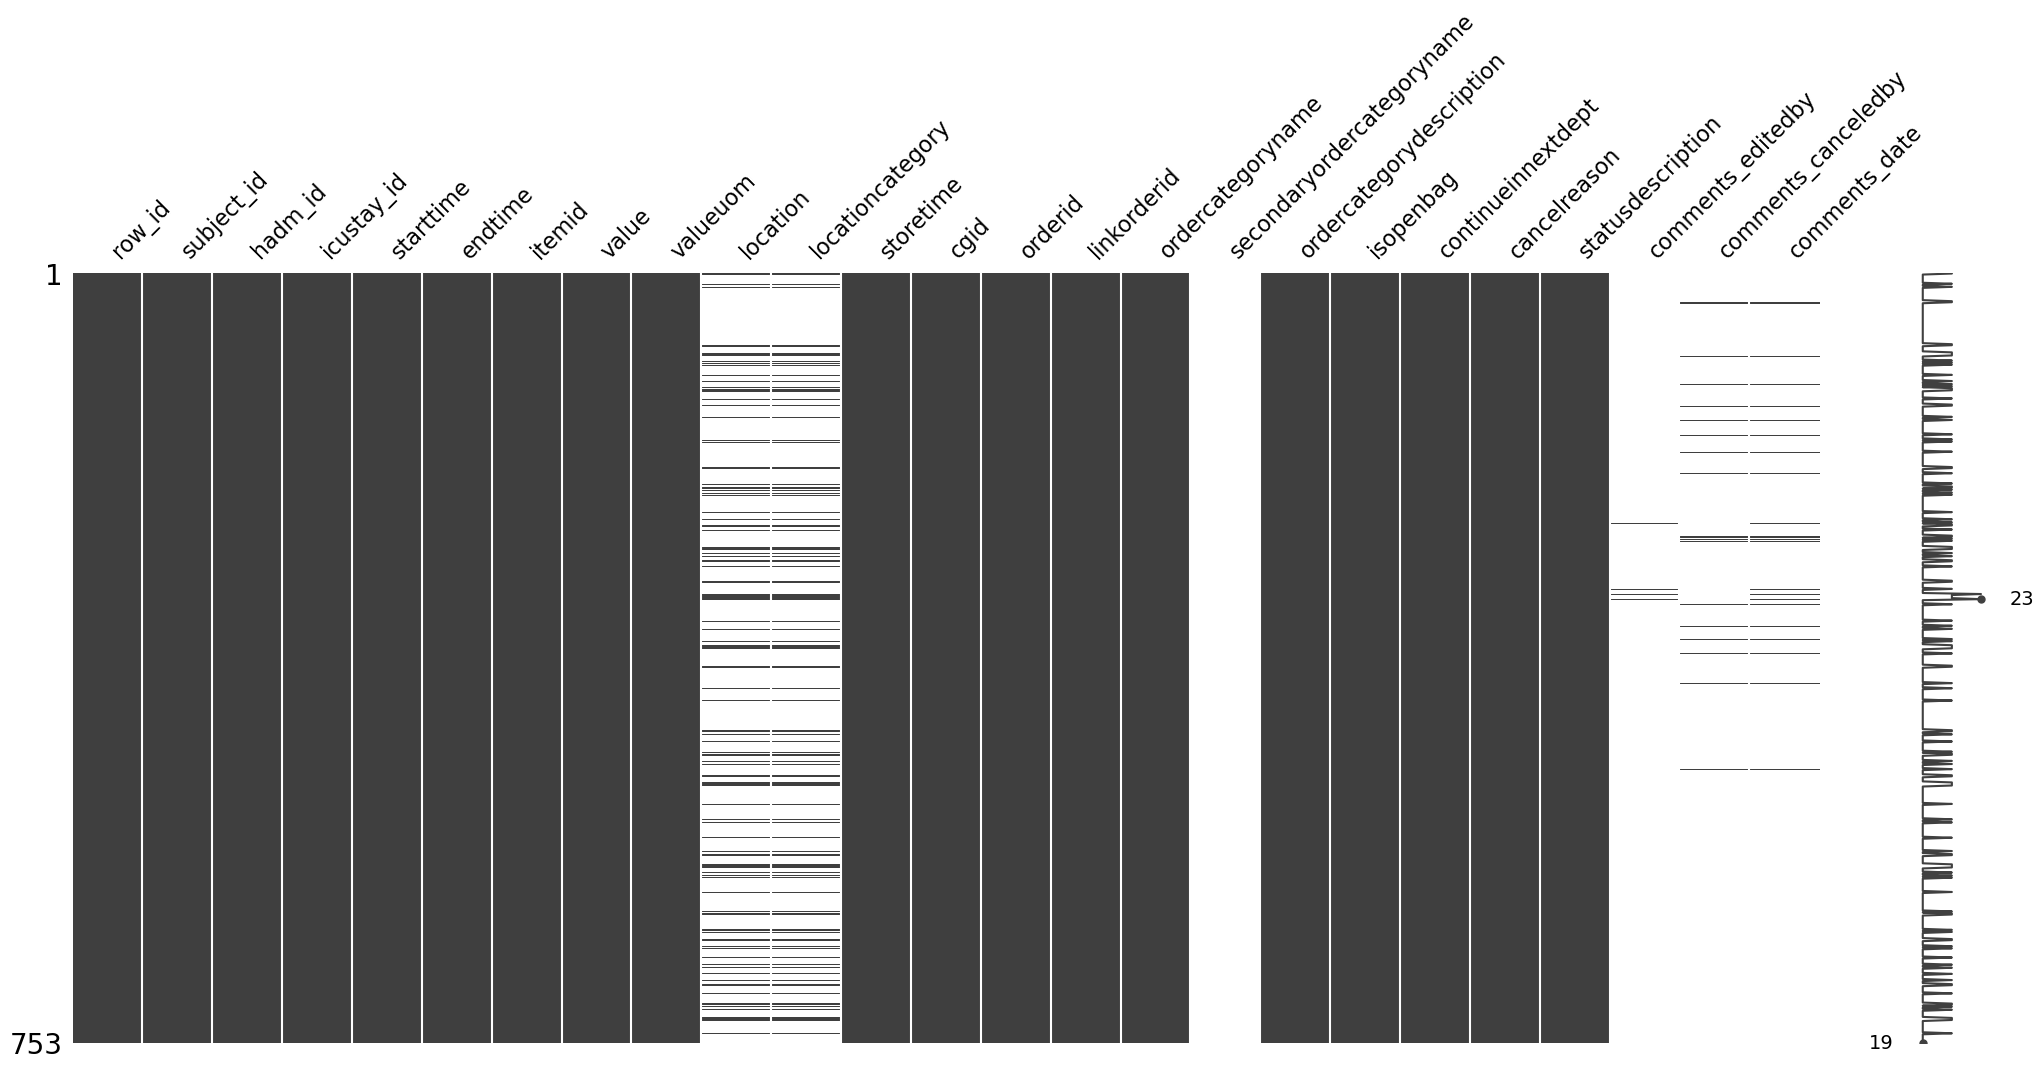

In [55]:
msno.matrix(df4)

In [56]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   row_id                      753 non-null    int64  
 1   subject_id                  753 non-null    int64  
 2   hadm_id                     753 non-null    int64  
 3   icustay_id                  753 non-null    int64  
 4   starttime                   753 non-null    object 
 5   endtime                     753 non-null    object 
 6   itemid                      753 non-null    int64  
 7   value                       753 non-null    int64  
 8   valueuom                    753 non-null    object 
 9   location                    118 non-null    object 
 10  locationcategory            118 non-null    object 
 11  storetime                   753 non-null    object 
 12  cgid                        753 non-null    int64  
 13  orderid                     753 non

In [57]:
valores_NaN(df4)

La columna con el nombre: 'location' tiene: '635' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'locationcategory' tiene: '635' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'secondaryordercategoryname' tiene: '753' valores NaN en sus registros y sus datos son del tipo: 'float64'
La columna con el nombre: 'comments_editedby' tiene: '749' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'comments_canceledby' tiene: '734' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'comments_date' tiene: '730' valores NaN en sus registros y sus datos son del tipo: 'object'
La cantidad de columnas con valores faltantes es de: 6


In [58]:
df4.describe()

,row_id,subject_id,hadm_id,icustay_id,itemid,value,cgid,orderid,linkorderid,secondaryordercategoryname,isopenbag,continueinnextdept,cancelreason
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02,7.530000e+02,0.0,753.000000,753.0,753.000000
mean,51691.683931,42225.608234,150339.880478,249563.475432,224765.215139,1580.416999,18173.418327,4.756905e+06,4.742526e+06,NaN,0.401062,0.0,0.035857
std,41537.435143,1313.460256,28845.587052,30016.762589,1330.645212,3792.474381,2282.737667,2.872627e+06,2.872255e+06,NaN,0.490439,0.0,0.212733
min,8641.000000,40124.000000,100969.000000,201204.000000,221214.000000,1.000000,14037.000000,1.127400e+04,1.127400e+04,NaN,0.000000,0.0,0.000000
25%,22229.000000,41795.000000,125157.000000,220671.000000,224275.000000,1.000000,16139.000000,2.336760e+06,2.315887e+06,NaN,0.000000,0.0,0.000000
50%,36875.000000,42075.000000,151323.000000,250305.000000,225401.000000,1.000000,18240.000000,4.532366e+06,4.485146e+06,NaN,0.000000,0.0,0.000000
75%,65258.000000,43746.000000,174245.000000,279529.000000,225459.000000,1488.000000,20866.000000,7.241374e+06,7.225958e+06,NaN,1.000000,0.0,0.000000
max,238542.000000,44228.000000,198480.000000,298685.000000,228129.000000,30693.000000,21545.000000,9.952300e+06,9.952300e+06,NaN,1.000000,0.0,2.000000


### Analisis
- El dataset contiene 753 registros y 25 columnas.
- 6 columnas contienen valores nulos.
- 12 columnas del tipo entero, 1 del tipo flotante y las restantes del tipo object.
- 4 columnas tienen informacion de fechas.
- La columna "secondaryordercategoryname" no tienen ningun valor.


### Unicos en columnas con valores faltantes

In [61]:
df4["location"].unique()

array(['Right Femoral.', 'Right Antecube ', nan, 'Left Radial',
       'LL Ant Forearm Lateral', 'LL Ant Forearm', 'Right IJ',
       'L Wrist Medial', 'R Antecube', 'L Antecube', 'Right Radial',
       'Left IJ', 'R Hand', 'R Wrist', 'L Hand', 'L Hand Lateral',
       'Left Subclavian', 'Right Upper Arm', 'RL Ant Forearm',
       'LL Post Forearm', 'RL Ant Forearm Lateral', 'L Wrist',
       'RL Post Forearm', 'Right Femoral', 'Right Basilic Lower Arm',
       'Left Cephalic Lower Arm', 'Right Antecubital', 'Left Metacarpal',
       'Right Metacarpal', 'Left Digital', 'Right Digital'], dtype=object)

In [69]:
df4["locationcategory"].unique()

array(['Invasive Venous', nan, 'Invasive Arterial', 'Peripheral - old',
       'Peripheral'], dtype=object)

In [63]:
df4["comments_editedby"].unique()

array([nan, 'RN'], dtype=object)

In [64]:
df4["comments_canceledby"].unique()

array([nan, 'MD', 'RN'], dtype=object)

In [65]:
df4["comments_date"].unique()

array([nan, '2147-10-14 09:52:00', '2147-10-14 10:00:00',
       '2119-10-17 13:56:00', '2198-10-29 21:28:00',
       '2119-11-10 16:09:00', '2170-12-15 08:20:00',
       '2170-12-17 17:08:00', '2145-12-07 18:29:00',
       '2121-12-08 00:17:00', '2123-12-07 14:51:00',
       '2123-12-13 20:27:00', '2123-12-13 20:28:00',
       '2123-12-19 16:54:00', '2199-01-15 08:15:00',
       '2166-02-13 01:03:00', '2166-02-15 23:20:00',
       '2166-02-21 15:34:00', '2166-02-24 17:07:00',
       '2199-02-03 12:36:00', '2117-03-25 10:31:00',
       '2145-07-14 11:23:00'], dtype=object)

### Otros valores unicos

In [66]:
df4["valueuom"].value_counts()

None    434
min     319
Name: valueuom, dtype: int64

In [67]:
df4["ordercategoryname"].value_counts()

Procedures               215
Peripheral Lines         176
Imaging                  152
Invasive Lines            95
Intubation/Extubation     40
Ventilation               30
Significant Events        25
Dialysis                  16
Continuous Procedures      2
CRRT Filter Change         1
Communication              1
Name: ordercategoryname, dtype: int64

In [71]:
df4["ordercategorydescription"].value_counts()

Electrolytes    434
Task            319
Name: ordercategorydescription, dtype: int64

In [72]:
df4["isopenbag"].value_counts()

0    451
1    302
Name: isopenbag, dtype: int64

In [73]:
df4["continueinnextdept"].value_counts()

0    753
Name: continueinnextdept, dtype: int64

In [74]:
df4["statusdescription"].value_counts()

FinishedRunning    723
Rewritten           26
Paused               2
Stopped              2
Name: statusdescription, dtype: int64

### Cambio del formato de fechas

In [75]:
df4["starttime"] = pd.to_datetime(df4["starttime"])
df4["endtime"] = pd.to_datetime(df4["endtime"])
df4["storetime"] = pd.to_datetime(df4["storetime"])
df4["comments_date"] = pd.to_datetime(df4["comments_date"])

**Valores minimos y maximos de fechas**

In [77]:
df4["starttime"].min()

Timestamp('2102-08-31 17:07:00')

In [78]:
df4["endtime"].max()

Timestamp('2202-05-02 22:27:00')

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

## Archivo #15 de diccionario de Tablas (CPTEVENTS)

In [79]:
df5 = pd.read_csv("dataset/CPTEVENTS.csv")

In [80]:
df5.head()

,row_id,subject_id,hadm_id,costcenter,chartdate,cpt_cd,cpt_number,cpt_suffix,ticket_id_seq,sectionheader,subsectionheader,description
0,4615,10117,105150,ICU,NaN,99254,99254,NaN,1.0,Evaluation and management,Consultations,NaN
1,4616,10117,105150,ICU,NaN,99231,99231,NaN,2.0,Evaluation and management,Hospital inpatient services,NaN
2,4617,10117,105150,ICU,NaN,90935,90935,NaN,3.0,Medicine,Dialysis,NaN
3,4618,10117,105150,ICU,NaN,99231,99231,NaN,4.0,Evaluation and management,Hospital inpatient services,NaN
4,7753,10111,174739,ICU,NaN,99253,99253,NaN,1.0,Evaluation and management,Consultations,NaN


<AxesSubplot:>

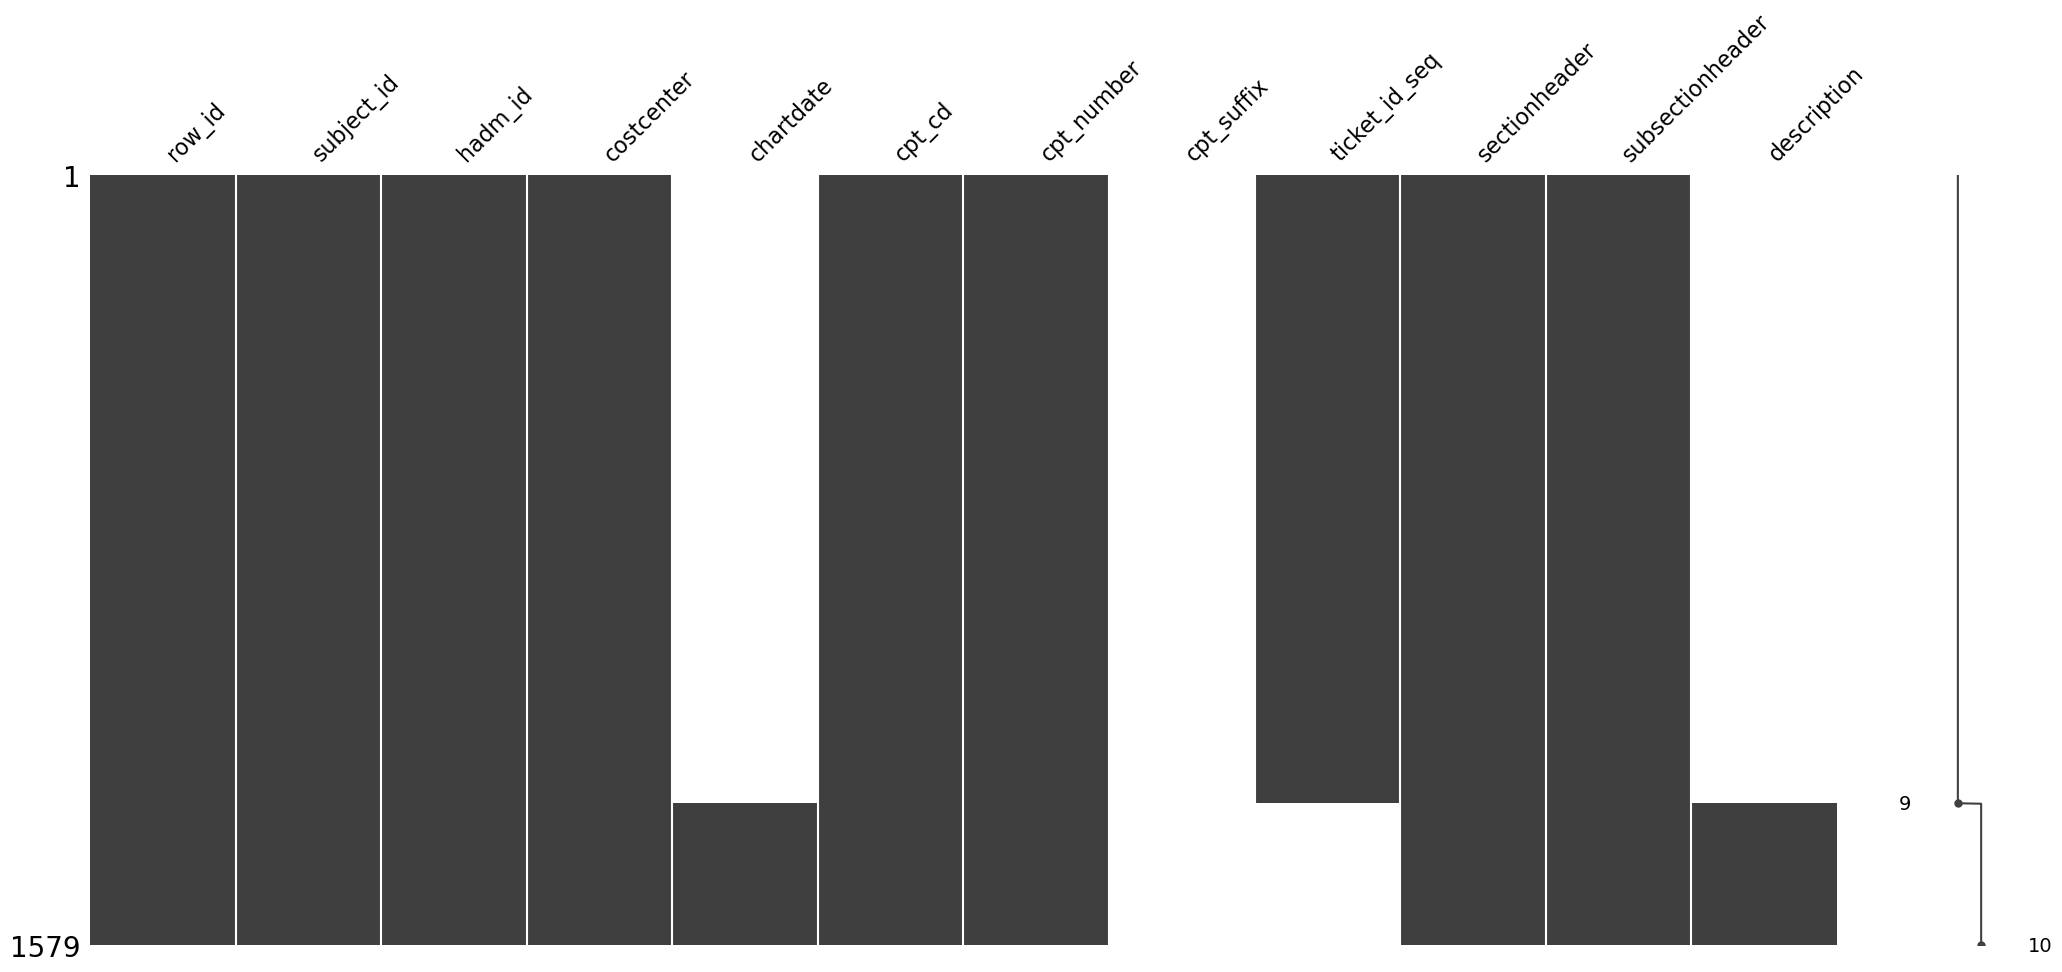

In [81]:
msno.matrix(df5)

In [82]:
valores_NaN(df5)

La columna con el nombre: 'chartdate' tiene: '1288' valores NaN en sus registros y sus datos son del tipo: 'object'
La columna con el nombre: 'cpt_suffix' tiene: '1579' valores NaN en sus registros y sus datos son del tipo: 'float64'
La columna con el nombre: 'ticket_id_seq' tiene: '291' valores NaN en sus registros y sus datos son del tipo: 'float64'
La columna con el nombre: 'description' tiene: '1288' valores NaN en sus registros y sus datos son del tipo: 'object'
La cantidad de columnas con valores faltantes es de: 4


In [83]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            1579 non-null   int64  
 1   subject_id        1579 non-null   int64  
 2   hadm_id           1579 non-null   int64  
 3   costcenter        1579 non-null   object 
 4   chartdate         291 non-null    object 
 5   cpt_cd            1579 non-null   int64  
 6   cpt_number        1579 non-null   int64  
 7   cpt_suffix        0 non-null      float64
 8   ticket_id_seq     1288 non-null   float64
 9   sectionheader     1579 non-null   object 
 10  subsectionheader  1579 non-null   object 
 11  description       291 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 148.2+ KB


In [84]:
df5.describe()

,row_id,subject_id,hadm_id,cpt_cd,cpt_number,cpt_suffix,ticket_id_seq
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,0.0,1288.000000
mean,254352.809373,30132.860038,157868.511083,94952.146928,94952.146928,NaN,34.559783
std,152033.453716,15398.361505,27904.711248,13529.257441,13529.257441,NaN,41.359769
min,4615.000000,10006.000000,100375.000000,11043.000000,11043.000000,NaN,1.000000
25%,136183.500000,10120.000000,138132.000000,94003.000000,94003.000000,NaN,7.000000
50%,238558.000000,40310.000000,163189.000000,99232.000000,99232.000000,NaN,18.000000
75%,275015.500000,42135.000000,182839.000000,99253.000000,99253.000000,NaN,44.000000
max,543399.000000,44228.000000,199395.000000,99367.000000,99367.000000,NaN,192.000000


### Analisis
- 1579 registros y 12 columnas.
- 5 columnas con valores enteros, 2 con valores flotantes y las restantes con valores del tipo object.
- 4 columnas tienen valores nulos.
- Los datos de la columna "chartdate" con valores nulos tienen en la columna "ticket_id_seq" algun valor mientras que los que tienen un valor en la columna "chartdate" no tienen un valor en "ticket_id_seq".
- Una columna tiene informacion de fechas.


### Valores unicos de campos con valores nulos

In [87]:
df5["ticket_id_seq"].unique() # Los valores son flotantes pero podrian ser enteros

array([  1.,   2.,   3.,   4.,  10.,   5.,   6.,   7.,   8.,   9.,  40.,
        41.,  42.,  43.,  44.,  45.,  11.,  12.,  13.,  14.,  15.,  16.,
        17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,
        28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76., 144.,
       145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155.,
       156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166.,
       167., 168., 169., 170., 172., 173., 174., 175., 176., 177., 178.,
       179., 180.,  95.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
       127., 128., 129., 130., 131., 132., 133., 13

In [88]:
df5["description"].unique()

array([nan, 'VENT MGMT, 1ST DAY (INVASIVE)',
       'VENT MGMT;SUBSQ DAYS(INVASIVE)', 'VENT MGMT,1ST DAY (NIV)',
       'VENT MGMT;SUBSQ DAYS(NIV)'], dtype=object)

### Otros valores unicos

In [89]:
df5["sectionheader"].value_counts()

Evaluation and management    1150
Medicine                      351
Surgery                        75
Radiology                       3
Name: sectionheader, dtype: int64

In [91]:
df5["subsectionheader"].unique()

array(['Consultations', 'Hospital inpatient services', 'Dialysis',
       'Follow-up inpatient consultations (deleted codes)',
       'Critical care services', 'Cardiovascular', 'Respiratory system',
       'Diagnostic ultrasound', 'Cardiovascular system',
       'Confirmatory consultation for a new or established patient (deleted codes)',
       'Musculoskeletal system', 'Digestive system', 'Prolonged services',
       'Mediastinum and diaphragm', 'Case management services',
       'Integumentary system', 'Hemic and lymphatic systems',
       'Urinary system',
       'Hydration, therapeutic, prophylactic, diagnostic injections and infusions, and chemotherapy and other highly complex drug or highly complex biologic agent administration',
       'Nervous system', 'Pulmonary'], dtype=object)